# Hab Dishab Dopamine Analysis

Plotting the DA associated with different DA metrics (Peak, Mean)
- Plot the peak DA during the first investigation (With and without mice identity)
- Plot the Average peak DA across multiple investigations

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *

In [2]:
# NAc: #15616F
# mPFC: #FFAF00

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac_csvs"
# brain_region = '#15616F'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc_csvs"
brain_region = '#FFAF00'

save_images = False

In [3]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]


In [4]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p5-240821-092649\Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p6-240821-103616\Notes.txt
read from t=0s to t=1322.66s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\

### Peak standard z-score

In [5]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = True)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, #otal_avg_bout_duration
                                  mode='standard')

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...
Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p6-240821-103616 ...
Computing DA metrics for p7-240821-111323 ...
Computing DA metrics for p8-240821-121933

In [6]:
exp_da_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [8]:
da_metadata_df.head(6)

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,p1,s1-1,Investigation,17.471746,5.432946,0.613750
1,p1,s1-2,Investigation,0.479414,0.663510,0.153085
2,p1,s1-3,Investigation,-0.734046,-0.665392,-0.758856
3,p1,s1-4,Investigation,1.327034,2.392535,2.102591
4,p1,s1-5,Investigation,0.126050,0.430645,0.103017
5,p1,s2-1,Investigation,9.651490,2.917188,1.122322


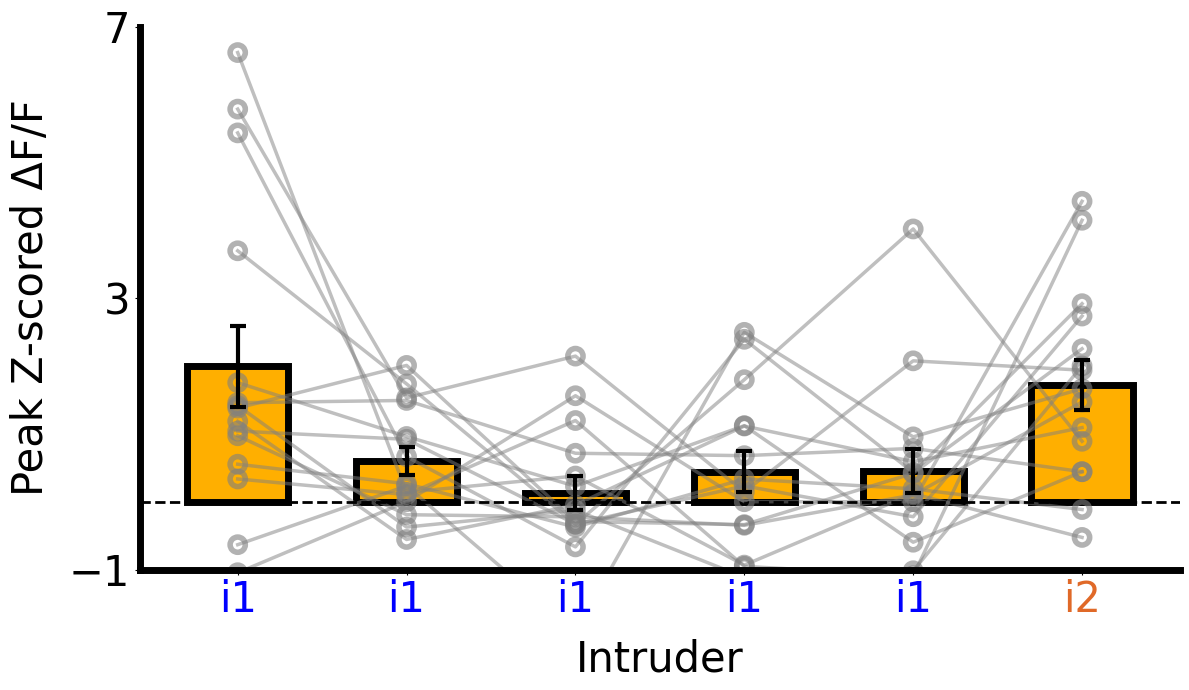


Paired t-test results (all pairwise combinations):
s1-1 vs s1-2: p = 0.0272 (*)
s1-1 vs s1-3: p = 0.0078 (**)
s1-1 vs s1-4: p = 0.0330 (*)
s1-1 vs s1-5: p = 0.0158 (*)
s1-1 vs s2-1: p = 0.7350 (ns)
s1-2 vs s1-3: p = 0.1541 (ns)
s1-2 vs s1-4: p = 0.6432 (ns)
s1-2 vs s1-5: p = 0.6057 (ns)
s1-2 vs s2-1: p = 0.0241 (*)
s1-3 vs s1-4: p = 0.5250 (ns)
s1-3 vs s1-5: p = 0.4580 (ns)
s1-3 vs s2-1: p = 0.0011 (**)
s1-4 vs s1-5: p = 0.9787 (ns)
s1-4 vs s2-1: p = 0.0235 (*)
s1-5 vs s2-1: p = 0.0381 (*)

Paired t-test results New:
s1-1 vs s1-2: p = 0.0272 (*), d = 0.637
s1-1 vs s1-3: p = 0.0078 (**), d = 0.801
s1-1 vs s1-4: p = 0.0330 (*), d = 0.611
s1-1 vs s1-5: p = 0.0158 (*), d = 0.709
s1-1 vs s2-1: p = 0.7350 (ns), d = 0.089
s1-2 vs s1-3: p = 0.1541 (ns), d = 0.389
s1-2 vs s1-4: p = 0.6432 (ns), d = 0.122
s1-2 vs s1-5: p = 0.6057 (ns), d = 0.136
s1-2 vs s2-1: p = 0.0241 (*), d = -0.653
s1-3 vs s1-4: p = 0.5250 (ns), d = -0.168
s1-3 vs s1-5: p = 0.4580 (ns), d = -0.197
s1-3 vs s2-1: p = 0.0011 (

In [9]:
# Average Bout Duration Across Bouts
plot_behavior_across_bouts_no_identities(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title=None,
    xlabel="Intruder",
    ylabel="Peak Z-scored ΔF/F",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-1, 5),
    bar_color=brain_region,
    yticks_increment=4,
    figsize=(12,7),
    pad_inches=0.1,
    save=save_images,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_C1_3_Peak"
)

In [10]:
from statsmodels.stats.multitest import multipletests

# your two raw p‐values:
comparisons = ["s1-1 vs s1-2", "s1-5 vs s2-1"]
raw_p     = [0.0076,      0.003]

# Holm–Bonferroni
reject, p_adj, _, _ = multipletests(raw_p, alpha=0.05, method='holm')

for comp, p0, p1, rej in zip(comparisons, raw_p, p_adj, reject):
    sig = "✓" if rej else "n.s."
    print(f"{comp}: raw p = {p0:.4f}, Holm-adj p = {p1:.4f} → {sig}")


s1-1 vs s1-2: raw p = 0.0076, Holm-adj p = 0.0076 → ✓
s1-5 vs s2-1: raw p = 0.0030, Holm-adj p = 0.0060 → ✓


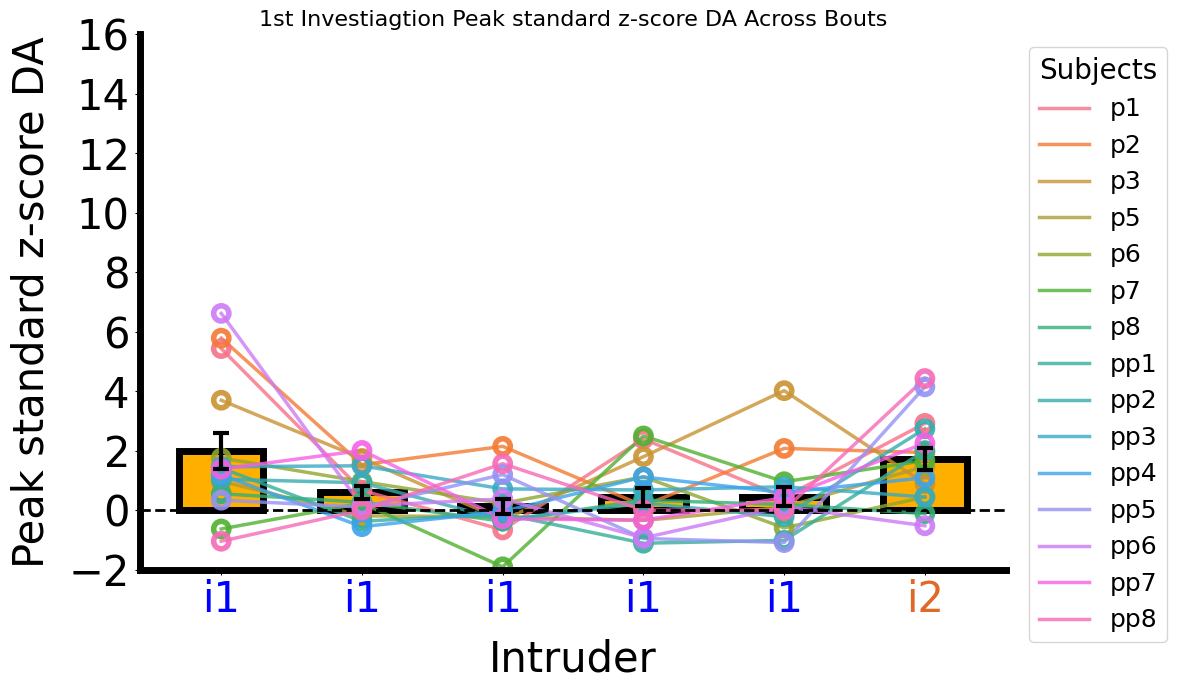

In [11]:
# Average Bout Duration Across Bouts
plot_behavior_across_bouts_with_identities(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title="1st Investiagtion Peak standard z-score DA Across Bouts",
    xlabel="Intruder",
    ylabel="Peak standard z-score DA",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-2, 15),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=save_images,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_Peak_Across_Bouts_WIDENTITIES.png"
)

Restart because not only looking at first investigation any longer

In [12]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, # total_avg_bout_duration 
                                  mode='standard')

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...
Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p6-240821-103616 ...
Computing DA metrics for p7-240821-111323 ...
Computing DA metrics for p8-240821-121933

In [13]:
exp_da_dict = get_trial_dataframes(experiment)
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']

IMPORTANT NOTE OF FUNCTION: the reason why there might be a discrepancy in the number of mice displayed is because if a subject doesn't have x subsequent investigations, then the mouse is not included

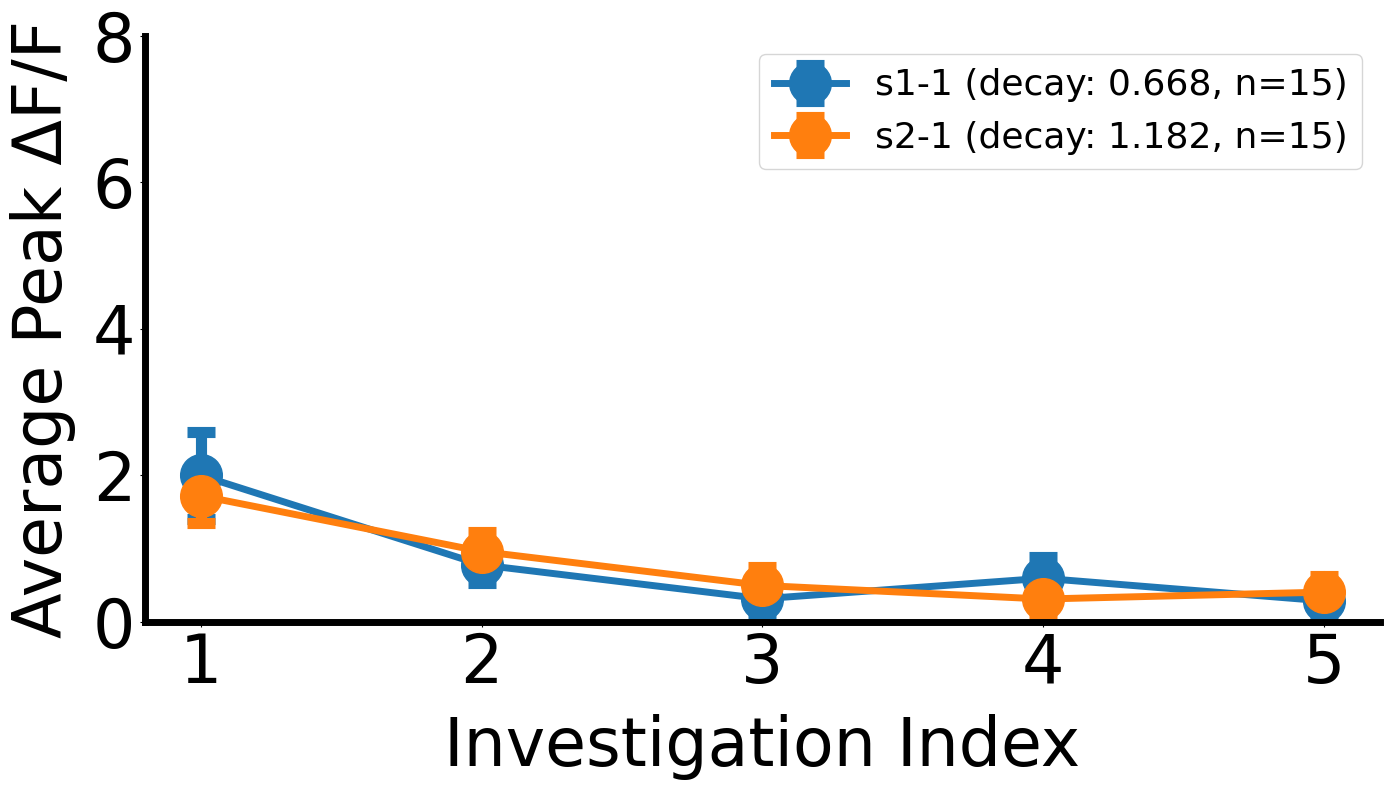


=== Computed Metric (DECAY): ===
Bout: s1-1, decay = 0.668
Bout: s2-1, decay = 1.182


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,s1-1,1,15,1.996243,2.315780,0.597932
1,s1-1,2,15,0.774535,0.946413,0.244363
2,s1-1,3,15,0.312025,0.854074,0.220521
3,s1-1,4,14,0.591993,1.074871,0.287271
4,s1-1,5,13,0.283260,0.842482,0.233662
5,s2-1,1,15,1.718330,1.436915,0.371010
6,s2-1,2,15,0.957626,1.017188,0.262637
7,s2-1,3,15,0.494090,0.963029,0.248653
8,s2-1,4,13,0.308373,0.892733,0.247600
9,s2-1,5,13,0.403051,0.797388,0.221156


In [14]:
plot_peak_for_subsequent_behaviors(
    exp_da_dict,
    behavior="Investigation",
    selected_bouts=["s1-1", "s2-1"],
    n_subsequent_behaviors=5,
    peak_col="Max Peak",
    metric_type='decay', 
    xlabel="Investigation Index",
    ylabel="Average Peak ΔF/F",
    ylim=(0, 8),
    ytick_increment=2,
    plot_title="",
    save = False,
    save_path=r"Hab_Dishab_Plots\mPFC_DA\peaks_for_subsequent_behaviors.png" 
)